# Time Series Forecasting with ARIMA
## ://thecleverprogrammer.com/2022/06/21/time-series-forecasting-with-arima/
### also investopedia for some jargons 

things i Learnt-
1. **ARIMA is a finance term...not a coding model**
2. **autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends.**
3. **A statistical model is autoregressive if it predicts future values based on past values.**
4. **Autoregressive integrated moving average (ARIMA) models predict future values based on past values.**
5. **ARIMA makes use of lagged moving averages to smooth time series data.**
6. **They are widely used in technical analysis to forecast future security prices.**
7. **Autoregressive models implicitly assume that the future will resemble the past.**
8. **Therefore, they can prove inaccurate under certain market conditions, such as financial crises or periods of rapid technological change.**
9. **A time series is a sequence of data points that occur in successive order over some period of time.**
10. **Time Series Forecasting means analyzing and modeling time-series data to make future decisions.**
11. **ARIMA models have three parameters like ARIMA(p, d, q). Here p, d, and q are defined as:
>p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.

>d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.

>q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.
12. ****
-https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp#:~:text=An%20autoregressive%20integrated%20moving%20average%2C%20or%20ARIMA%2C%20is%20a%20statistical,values%20based%20on%20past%20values.
-https://www.investopedia.com/terms/t/timeseries.asp

In [1]:
#pip install yfinance

In [3]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

In [6]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=360)
d2 = d2.strftime("%Y-%m-%d")
start_date=d2

In [8]:
data = yf.download('RELIANCE.BO',start=start_date, end=end_date, progress=False)
print(data.head)                 

<bound method NDFrame.head of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-11-17  2499.699951  2500.000000  2460.350098  2464.050049  2456.651611   
2021-11-18  2459.899902  2489.000000  2450.600098  2472.750000  2465.325439   
2021-11-22  2440.000000  2446.250000  2351.000000  2363.399902  2356.303711   
2021-11-23  2339.000000  2401.500000  2309.399902  2386.149902  2378.985352   
2021-11-24  2381.399902  2410.850098  2344.000000  2350.899902  2343.841309   
...                 ...          ...          ...          ...          ...   
2022-11-04  2548.000000  2595.250000  2548.000000  2592.449951  2592.449951   
2022-11-07  2592.000000  2609.899902  2574.000000  2606.149902  2606.149902   
2022-11-09  2606.000000  2621.500000  2591.350098  2603.000000  2603.000000   
2022-11-10  2585.000000  2596.949951  2563.000000  2574.449951  2574.449951   
2022-11-11  2598.69995

In [9]:
data['Date'] = data.index

In [10]:
data = data[['Date', "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date         Open         High          Low        Close  \
240 2022-11-04  2548.000000  2595.250000  2548.000000  2592.449951   
241 2022-11-07  2592.000000  2609.899902  2574.000000  2606.149902   
242 2022-11-09  2606.000000  2621.500000  2591.350098  2603.000000   
243 2022-11-10  2585.000000  2596.949951  2563.000000  2574.449951   
244 2022-11-11  2598.699951  2635.000000  2587.250000  2631.350098   

       Adj Close  Volume  
240  2592.449951  295536  
241  2606.149902  168418  
242  2603.000000  185280  
243  2574.449951  240161  
244  2631.350098  402694  


In [12]:
data = data[["Date", "Close"]]
print(data)

          Date        Close
0   2021-11-17  2464.050049
1   2021-11-18  2472.750000
2   2021-11-22  2363.399902
3   2021-11-23  2386.149902
4   2021-11-24  2350.899902
..         ...          ...
240 2022-11-04  2592.449951
241 2022-11-07  2606.149902
242 2022-11-09  2603.000000
243 2022-11-10  2574.449951
244 2022-11-11  2631.350098

[245 rows x 2 columns]


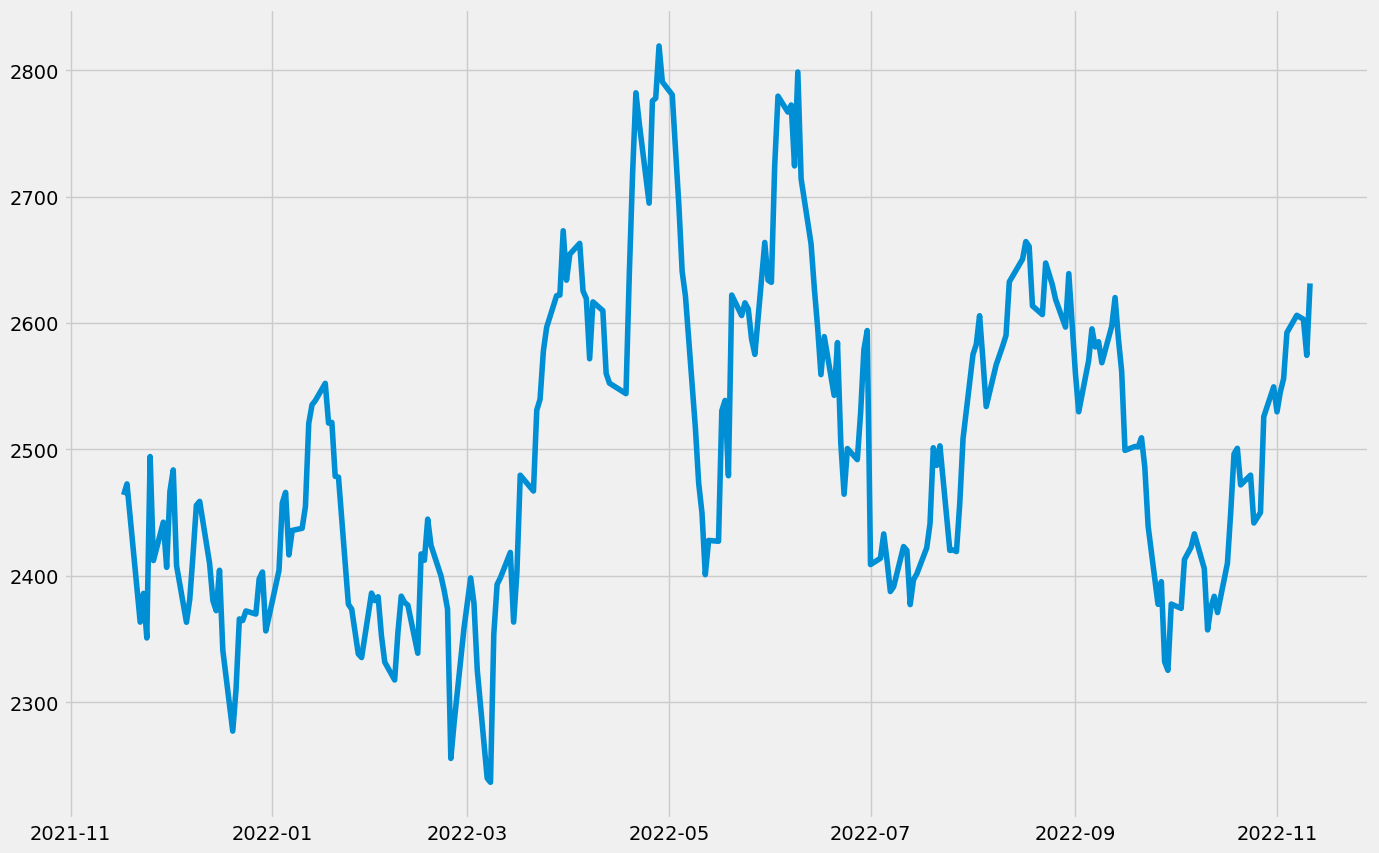

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data['Date'], data['Close'])

Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

<Figure size 640x480 with 0 Axes>

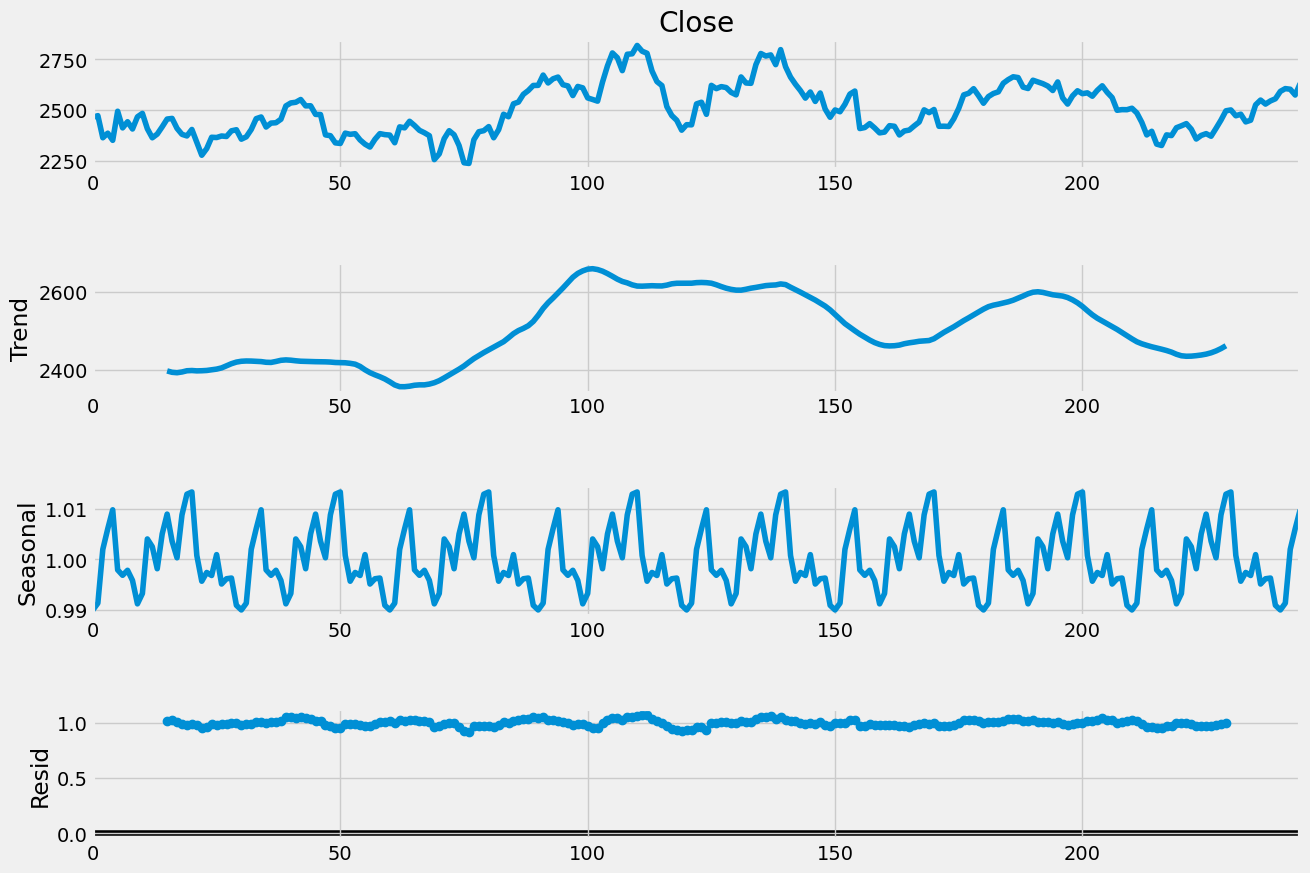

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

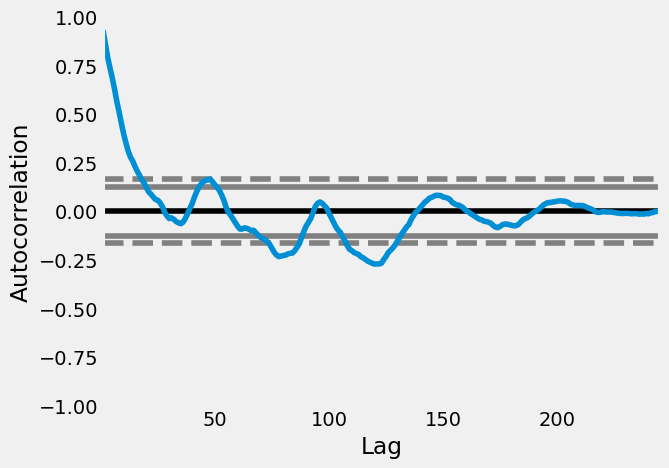

In [20]:
pd.plotting.autocorrelation_plot(data["Close"])

In [21]:
p=4 

In the above autocorrelation plot, the curve is moving down after the 4th line of the first boundary. That is how to decide the p-value. Hence the value of p is 4.

C:\Users\BESTSELLER\Anaconda_python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


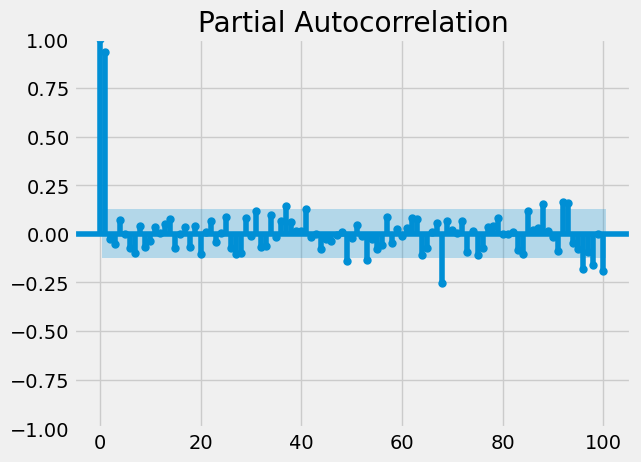

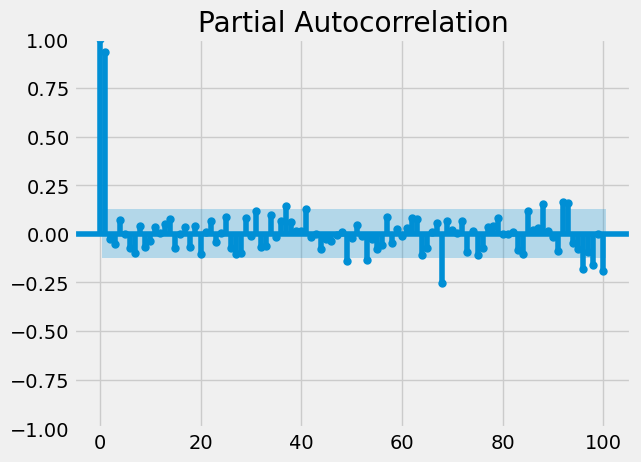

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [23]:
q=2

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2.

In [39]:
p, d, q = 4, 1, 2
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\BESTSELLER\Anaconda_python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\BESTSELLER\Anaconda_python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  245
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood               -1225.036
Date:                            Sat, 12 Nov 2022   AIC                           2476.073
Time:                                    15:07:19   BIC                           2520.880
Sample:                                         0   HQIC                          2494.143
                                            - 245                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2905      0.157      1.850      0.064      -0.017       0.598
ar.L2         -1.0778      0.135   

In [42]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

245    2664.437834
246    2648.106284
247    2654.559196
248    2655.462674
249    2662.985543
250    2665.070856
251    2643.520434
252    2646.376123
253    2639.496337
254    2659.934044
255    2664.634515
Name: predicted_mean, dtype: float64


<AxesSubplot:>

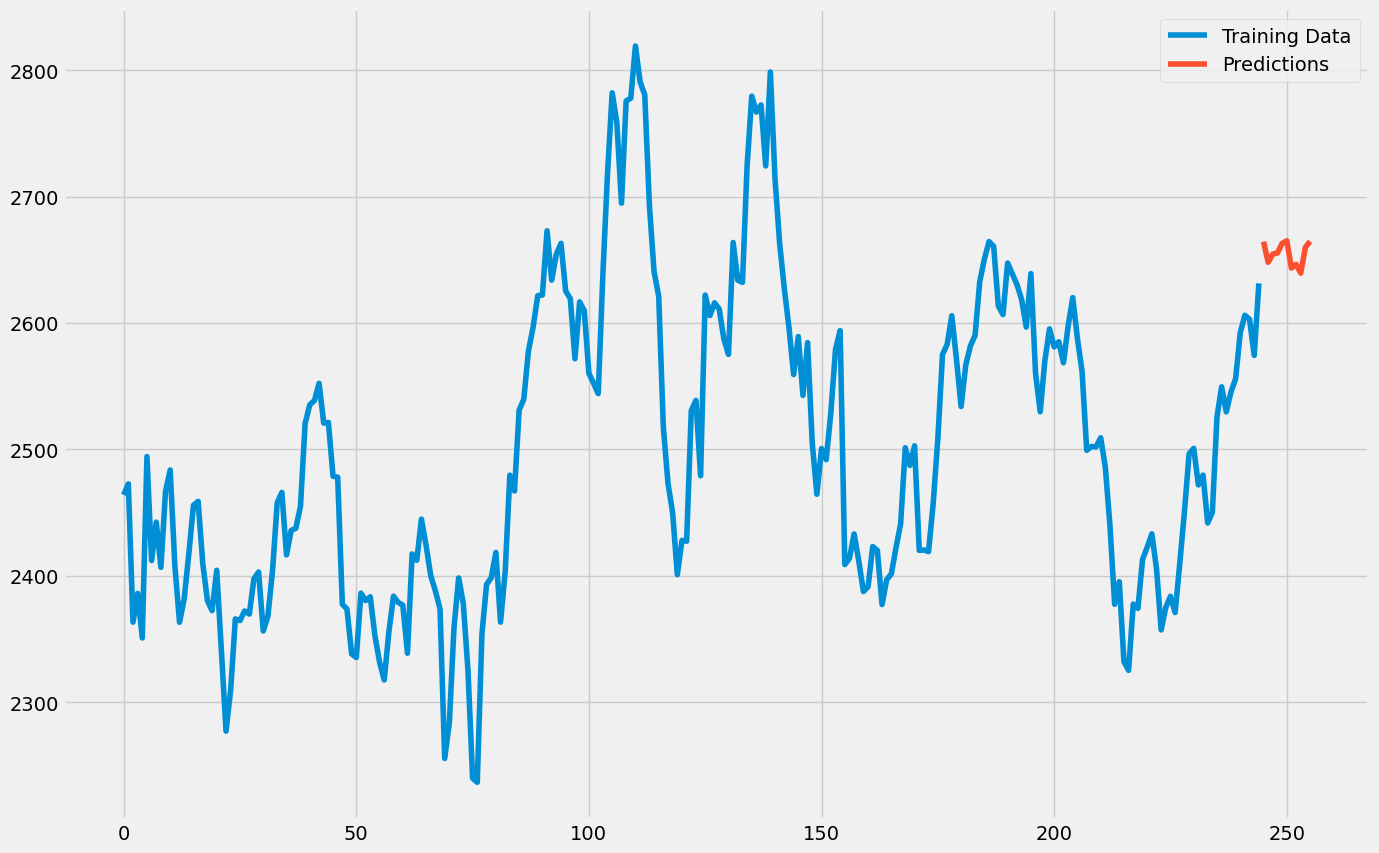

In [43]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [44]:

"""ARIMA MODEL-
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

predictions = fitted.predict()
print(predictions)
"""

'ARIMA MODEL-\np, d, q = 5, 1, 2\nfrom statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data["Close"], order=(p,d,q))  \nfitted = model.fit()  \nprint(fitted.summary())\n\npredictions = fitted.predict()\nprint(predictions)\n'

+10 days prediction as per 12.11.22 

245    2664.437834 

246    2648.106284

247    2654.559196

248    2655.462674

249    2662.985543

250    2665.070856

251    2643.520434

252    2646.376123

253    2639.496337

254    2659.934044

255    2664.634515